<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/05_Module_4_KNN_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

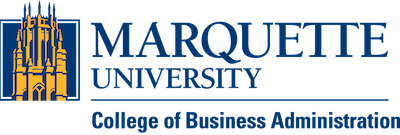

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Module 4 KNN Exercise Using R

Instructor: Dr. Badar Al Lawati

For cross-validation, we will use the holdout method or the k-fold method to develop and evaluate the KNN classification mode

Most data mining packages in R allow for the k-fold cross-validation method, which, when compared with the holdout method, is less sensitive to how the data are partitioned

We will divide the data set into two partitions. The training data set is used to generate one or more models, and the validation data set is used to evaluate the performance of the models and select the optimal value for *k*

*   60% for training
*   40% for validation

Finally, implement a 10-fold cross-validation technique

In [1]:
# Install if not already installed
install.packages("readxl")

# Load package
library(readxl)

# Import a specific sheet by name
myData <- read_excel("Gym.xlsx", sheet = "Gym_Data")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
# For KNN estimation and the resulting performance measures and
# diagrams, install and load the caret, gains, and pROC packages

install.packages("caret")
install.packages("gains")
install.packages("pROC")

library(caret)
library(gains)
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [9]:
# We use the scale function to standardize the Age, Income, and
# Hours variables; store the standardized values in a new data
# frame called myData1; and append the original Enroll variable
# back to myData1

myData1 <- scale(myData[2:4])
myData1 <- data.frame(myData1, myData$Enroll)
colnames(myData1)[4] <- 'Enroll'

In [10]:
# We use the as.factor function to convert the
# target variable (Enroll) into a categorical data type. To simplify
# the R code, we use the colnames function to rename
# myData1$myData.Enroll (in column 4) to myData1$Enroll

myData1$Enroll <- as.factor(myData1$Enroll)

In [11]:
# To partition the data into 60% training and 40% validation sets,
# we use the createDataPartition function and specify Enroll as the
# target variable

# To ensure consistency in results, we use the set.seed function to set the random seed to 1

set.seed(1)
myIndex <- createDataPartition(myData1$Enroll, p=0.6, list= FALSE)
trainSet <- myData1[myIndex,]
validationSet <- myData1[-myIndex,]

In [13]:
# We use the trainControl function to implement a 10-fold crossvalidation
# by setting the option method equal to “cv” and the
# option number equal to 10

myCtrl <- trainControl(method = "cv", number = 10)

In [14]:
# We use the expand.grid function to specify possible k values from
# 1 to 10 and store the results in an object called myGrid. The
# optimal k value is determined based on accuracy. (The possible
# range of k values may vary; you may experiment with a different
# range by changing the option number in the statement.)

myGrid <- expand.grid(.k=c(1:10))

In [15]:
# To implement the KNN method with the training data set with
# option values specified earlier, we use the train function
# and store the results in an object called KNN_fit

set.seed(1)
KNN_fit <- train(Enroll ~., data = trainSet, method = "knn",
trControl=myCtrl, tuneGrid = myGrid)
KNN_fit

k-Nearest Neighbors 

601 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 542, 541, 541, 541, 540, 541, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.8801876  0.7505050
   2  0.8917422  0.7764723
   3  0.9118005  0.8175107
   4  0.9084398  0.8113167
   5  0.9118278  0.8184920
   6  0.9135218  0.8211520
   7  0.9117996  0.8161780
   8  0.9117986  0.8169491
   9  0.9118551  0.8157847
  10  0.9118551  0.8159418

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 6.

Note that the Enroll variable is specified as a target variable and “knn” is specified as the classification method

The value *k* = 6 yields the highest accuracy rate (0.9102695), which R will use in subsequent steps

In [16]:
# To assess the performance of the KNN model on an unseen data
# set, we apply the KNN model, which uses k = 6, on the validation
# data set using the predict function, and then we use the
# confusionMatrix function to create a confusion matrix

KNN_Class <- predict(KNN_fit, newdata = validationSet)
confusionMatrix(KNN_Class,validationSet$Enroll, positive ='1')

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 216  14
         1  22 147
                                         
               Accuracy : 0.9098         
                 95% CI : (0.8773, 0.936)
    No Information Rate : 0.5965         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8141         
                                         
 Mcnemar's Test P-Value : 0.2433         
                                         
            Sensitivity : 0.9130         
            Specificity : 0.9076         
         Pos Pred Value : 0.8698         
         Neg Pred Value : 0.9391         
             Prevalence : 0.4035         
         Detection Rate : 0.3684         
   Detection Prevalence : 0.4236         
      Balanced Accuracy : 0.9103         
                                         
       'Positive' Class : 1              
                                         

Note that we identify Class 1 (Enroll in the gym) as the positive
(also called target or success) class

The confusion matrix results from the validation set indicate a high classification accuracy (0.9148), sensitivity (0.8944), and specificity (0.9286)

To evaluate the predictive performance of the KNN model, we can compare its performance measures to those of the naïve rule, where all cases are classified into the predominant class

Because there are 161 target class (Enroll in the gym) cases among the 399 validation data cases, the naïve rule would classify all cases into

the nontarget class (Do not enroll in the gym) and produce an accuracy rate of (399 – 161) ÷ 399 = 0.5965, sensitivity of 0, and specificity of 1

Therefore, the KNN model shows better predictive performance than the naïve rule does, especially if the goal is to identify target class cases

The choice of the cutoff value can influence the confusion matrix and the
resulting performance measures. By default, **R uses 0.5** as the cutoff value for binary choice models

The analyst may choose to increase or decrease the cutoff value to classify fewer or more observations into the target class due to asymmetric misclassification costs or uneven class distributions

In this example, the opportunity cost of missing a potential gym member who would have purchased a gym membership is likely to be higher than the cost of reaching out to a potential gym member who ends up not purchasing a gym membership


Furthermore, among the 1,000 past open house attendees in the data set, 403 purchased gym memberships suggesting that the probability of an open house attendee purchasing the gym membership is 403 ÷ 1,000 = 0.403 instead of the default probability of 0.5 for a binary choice situation with equal class
distribution

In this case, the manager of the fitness center may reduce the cutoff value to a lower value than 0.5 in order to classify more cases into the target class in order to achieve a higher sensitivity value

In [17]:
# To evaluate the predictive performance of the KNN model using
# a different cutoff value in R, we first compute the probability of
# each case belonging to the target class instead of its class
# membership

# In the predict function, we set the type option equal to ‘prob’ to predict the probability values

KNN_Class_prob <- predict(KNN_fit, newdata = validationSet, type ='prob')
KNN_Class_prob

0,1
<dbl>,<dbl>
1.0000000,0.0000000
1.0000000,0.0000000
1.0000000,0.0000000
1.0000000,0.0000000
0.5000000,0.5000000
1.0000000,0.0000000
1.0000000,0.0000000
0.8333333,0.1666667
1.0000000,0.0000000


As you can see, the first column lists the probabilities of the cases belonging to Class 0 (Do not enroll in the gym), while the second column lists the probabilities of the cases belonging to Class 1 (Enroll in the gym)

To determine the class memberships of cases using a cutoff value other than the default probability of 0.5 (e.g., 0.403, in order to accurately classify more Class 1 cases), we compare the values to the new cutoff value

In [18]:
# To construct a confusion matrix using the new cutoff value of
# 0.403, we use the ifelse function to determine the predicted class memberships

# Because the confusionMatrix function requires that
# both the predicted and actual class memberships are of the factor
# data type, we use the as.factor function to convert the predicted
# class membership to factor, which is the same data type as the
# target variable, Enroll

confusionMatrix(as.factor(ifelse(KNN_Class_prob[,2]>0.403, '1', '0')), validationSet$Enroll, positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 215  10
         1  23 151
                                          
               Accuracy : 0.9173          
                 95% CI : (0.8858, 0.9424)
    No Information Rate : 0.5965          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8304          
                                          
 Mcnemar's Test P-Value : 0.03671         
                                          
            Sensitivity : 0.9379          
            Specificity : 0.9034          
         Pos Pred Value : 0.8678          
         Neg Pred Value : 0.9556          
             Prevalence : 0.4035          
         Detection Rate : 0.3784          
   Detection Prevalence : 0.4361          
      Balanced Accuracy : 0.9206          
                                          
       'Positive' Class : 1               
                              

The resulting confusion matrix (not shown here) provides the performance measures of the KNN model using the cutoff value of 0.403



In [19]:
# To create a cumulative gains table and a cumulative lift chart, we
# need to convert the Enroll variable to the numerical form as
# required by the gains package

validationSet$Enroll <- as.numeric(as.character(validationSet$ Enroll))

Note that it is critical that we convert Enroll, which is a factor variable with values of 0’s and 1’s, to a character variable first and then to a numerical variable in order to retain the original values of 0’s and 1’s, but in the numerical form. If Enroll were converted directly to a numerical variable, the values would be turned into 1’s and 2’s instead
---------------------

We generate the cumulative gains lift table using the gains function. The gains function requires two arguments: actual class memberships and predicted target class probabilities, both in numerical form

In [20]:
gains_table <- gains(validationSet$Enroll, KNN_Class_prob[,2])
gains_table

Warning message in gains(validationSet$Enroll, KNN_Class_prob[, 2]):
“Warning: Fewer distinct predicted values than groups requested”


Depth                            Cume   Cume Pct                     Mean
 of           Cume     Mean      Mean   of Total    Lift   Cume     Model
File     N      N      Resp      Resp      Resp    Index   Lift     Score
-------------------------------------------------------------------------
  19    76     76      0.92      0.92      43.5%     228    228      1.00
  34    59    135      0.86      0.90      75.2%     214    222      0.83
  41    27    162      0.81      0.88      88.8%     202    219      0.67
  44    12    174      0.67      0.87      93.8%     165    215      0.50
  49    22    196      0.23      0.80      96.9%      56    197      0.33
  50     2    198      0.50      0.79      97.5%     124    197      0.29
  59    38    236      0.03      0.67      98.1%       7    166      0.17
  60     2    238      0.50      0.67      98.8%     124    166      0.14
 100   161    399      0.01      0.40     100.0%       3    100      0.00

By default, the cumulative gains table divides the cases into 10 groups based on their probabilities of belonging to the target class

The last column shows the average probability for each group

(Note: These values are rounded to two digits after the decimal point.) In R, in situations where there are less than 10 possible probability values, the cumulative gains table and decile-wise lift chart will show less than 10 groups

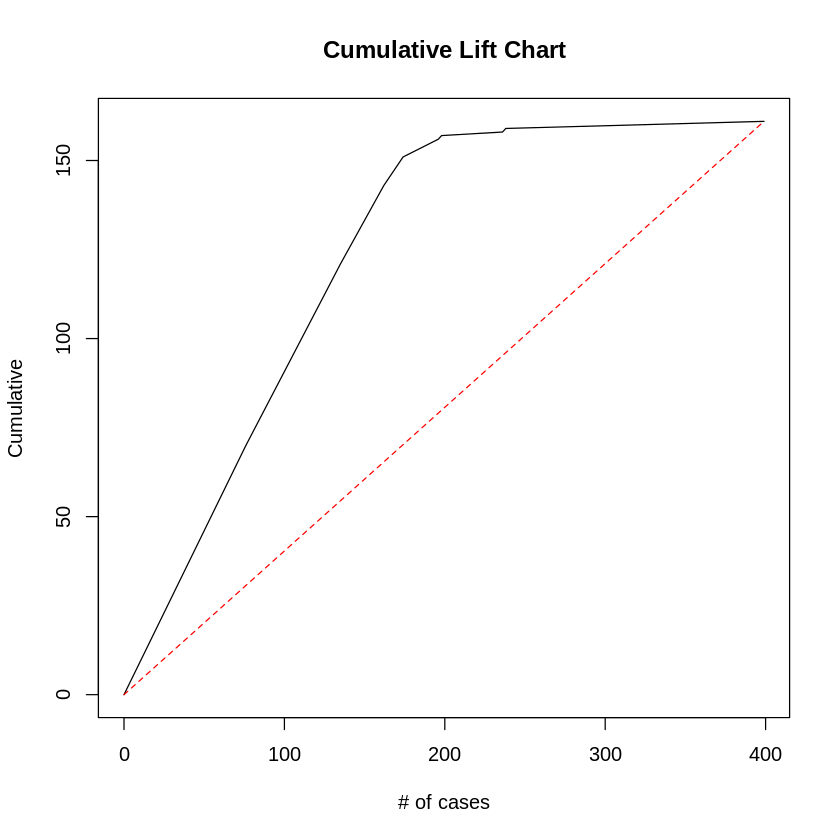

In [23]:
# We use the plot function to create the cumulative lift chart

plot(c(0, gains_table$cume.pct.of.total*sum(validationSet$Enroll)) ~ c(0, gains_table$cume.obs),xlab = "# of cases", ylab="Cumulative", main="Cumulative Lift Chart", type = "l")

lines(c(0, sum(validationSet$Enroll)) ~ c(0, dim(validationSet)[1]), col="red", lty=2)

The lift curve from the KNN model lies well above the diagonal
line, indicating that the KNN model performs considerably better
than the baseline model in terms of predicting whether or not an
open house attendee will purchase a gym membership

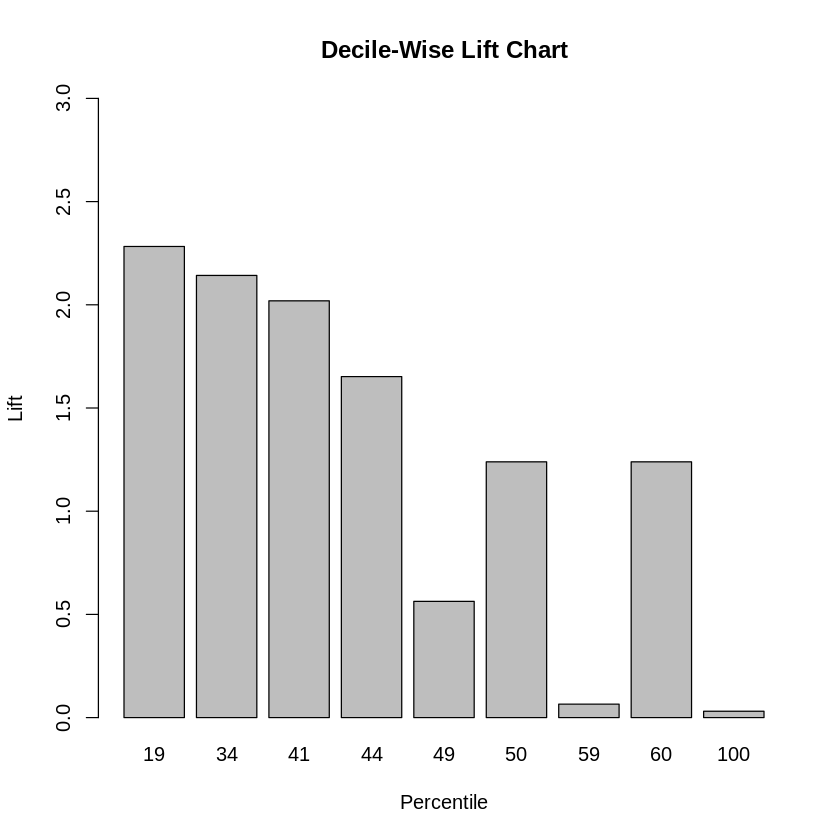

In [25]:
# To plot the decile-wise lift chart, we use the barplot function to plot a bar chart

barplot(gains_table$mean.resp/mean(validationSet$Enroll),
names.arg=gains_table$depth, xlab="Percentile", ylab="Lift", ylim = c(0,3), main = "Decile-Wise Lift Chart")

The decile-wise lift chart shows that if the 24/7 Fitness Center contacts the top 15% of the potential gym members with the highest predicted probability of enrolling, the gym would be able to capture 2.31 times as many potential
members who actually purchase the gym membership, compared to a scenario where the 24/7 Fitness Center randomly selects 15% of the potential members to contact

In addition, the decile-wise lift chart shows that the vast majority of the open house attendees who end up enrolling in a gym membership would have been
identified if 24/7 Fitness Center reached out to only the top 49% of the open house attendees with the highest predicted probabilities of belonging to the target class

Therefore, the KNN model shows superior predictive power compared to the baseline model

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9503

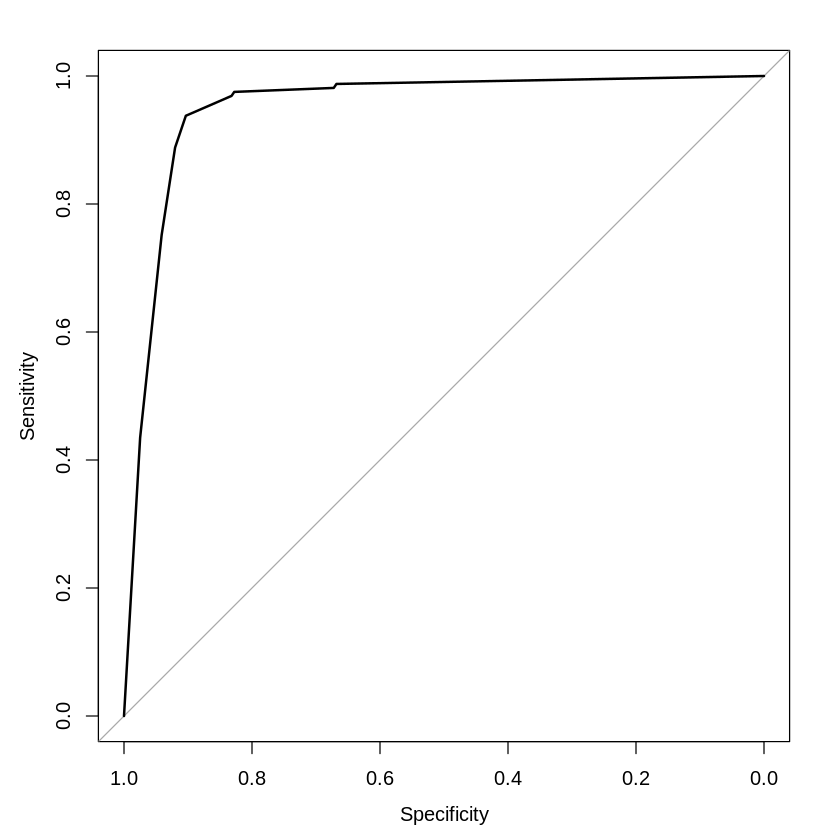

In [26]:
# We use the roc function, which produces a roc object that can be
# used to plot the ROC curve

# We then use the plot.roc function to plot the ROC curve and the auc function to retrieve the AUC value

roc_object<- roc(validationSet$Enroll, KNN_Class_prob[,2])
plot.roc(roc_object)
auc(roc_object)

The area under the ROC curve, or AUC, is very high (0.9532),
indicating that the KNN model performs extremely well in
predicting the gym enrollment among open house attendees

The KNN model
performs better than the baseline model (shown as the green
dashed diagonal line) in terms of sensitivity and specificity across
all cutoff values.

In [35]:
myScoreData <- read_excel("Gym.xlsx", sheet = "Gym_Score")

Because KNN identifies the nearest neighbors among the historical cases, we use the means and standard deviations calculated from the historical cases to standardize new data

Here we use the preProcess function to compute the means and standard deviations of the predictor variables in myData

The center method calculates the mean and subtracts it from each value, and the scale method computes the standard deviation and divides each value by the
standard deviation

The predict function uses the mean and standard deviation values from the pre-processing statement to standardize myScoreData and store the z-scores in a new data frame named myScoreData1

In [36]:
Processing <- preProcess(myData[ , 2:4], method = c("center", "scale"))

myScoreData1 <- predict(Processing, myScoreData)

KNN_Score <- predict(KNN_fit, newdata = myScoreData1)

Once the scoring is finished, the KNN_Score object will contain
classification results (whether or not the potential gym members
are likely to enroll: yes = 1 and no = 0)

We use the data.frame function to append the classification results back to the original data set and the View function to display the updated data set

In [37]:
myScoreData <- data.frame(myScoreData, KNN_Score)
View(myScoreData)

Age,Income,Hours,KNN_Score
<dbl>,<dbl>,<dbl>,<fct>
22,33000,5,0
23,65000,9,1
23,17000,15,0
24,21000,16,0
64,109000,20,1
39,67000,12,0
47,69000,21,0
37,34000,5,0
50,25000,9,0


**While the KNN output does not provide model interpretation explicitly, by reviewing the scoring results, we find that 24/7 Fitness Center should focus on contacting open house attendees who are older than 40 years with a high annual income in order to reach individuals who are more likely to purchase a gym membership**